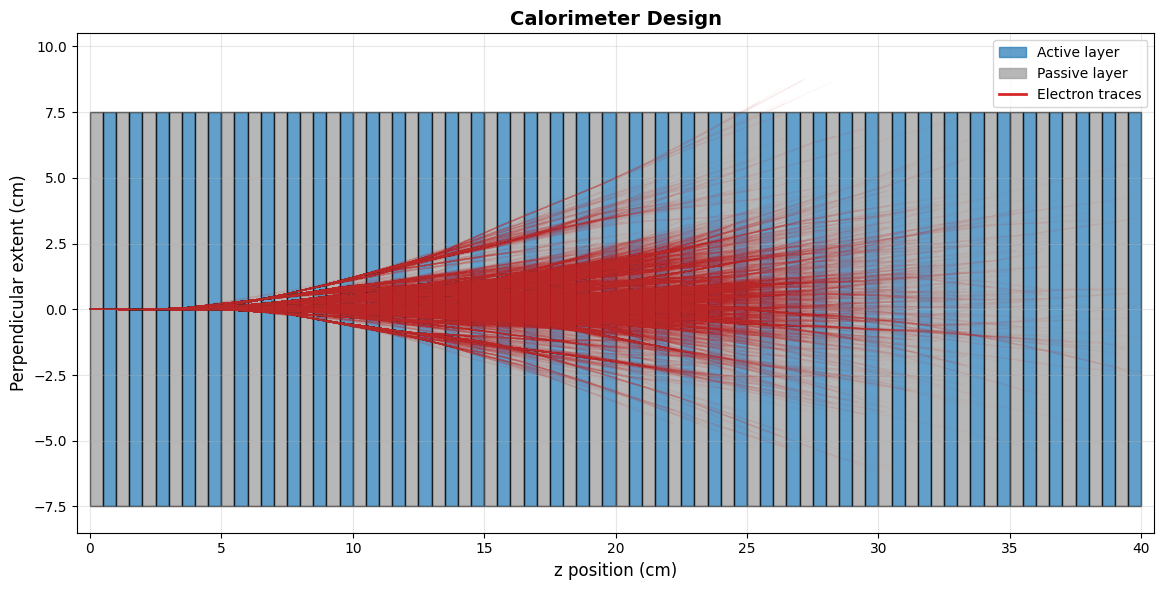

In [1]:
import time

from calorimeter import Calorimeter, Simulation, Layer, Electron
import matplotlib.pyplot as plt
import numpy as np


# ## An example illustrating how the code works
# 
# Create the calorimeter. In this case a sampling calorimeter with interchaging
# layers of scintillator (low density, active) and lead (high density, inactive).

mycal = Calorimeter()

lead = Layer('lead', 2.0, 0.5, 0.0)
scintillator = Layer('Scin', 0.01, 0.5, 1.0)

for i in range(40):
    mycal.add_layers([lead, scintillator])

zcors = mycal.positions()

sim = Simulation(mycal)

ionisations, cal_with_traces = sim.simulate_with_tracing(Electron(0.0, 100.0), deadcellfraction=0.0)

# Draw with particle traces
fig, ax = plt.subplots(figsize=(14, 6))
ax = cal_with_traces.draw(ax=ax, show_traces=True)
plt.tight_layout()
plt.show()

mycal.reset()


Simulation took 0.0200 seconds per particle
Relative resolution is 0.024


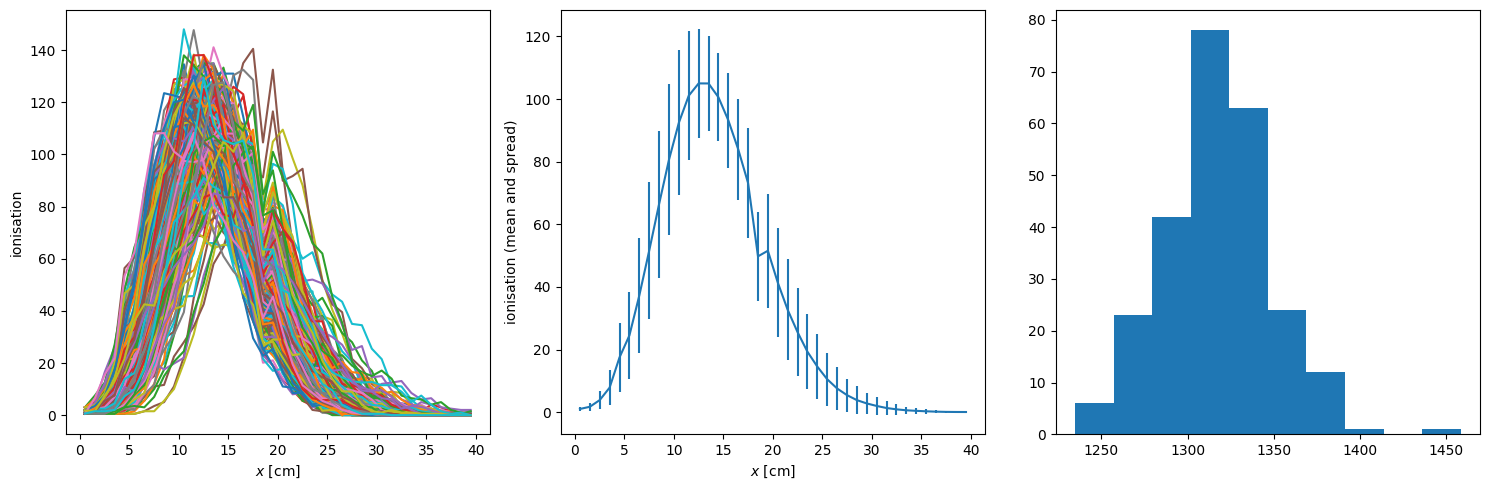

In [2]:

# Run a simulation of many particles to get some statistics
start_time = time.time()
ionisations = sim.simulate(Electron(0.0, 10.0), 250, deadcellfraction=0.0)
end_time = time.time()

elapsed_time = end_time - start_time
print(f'Simulation took {elapsed_time/250:.4f} seconds per particle')
meanionisations = np.mean(ionisations, axis=0)
rmsionisations = np.std(ionisations, axis=0)
energies = np.sum(ionisations, axis=1)
rel_resolution = np.std(energies)/np.mean(energies)

print(f'Relative resolution is {rel_resolution:.3f}')


# Create some plots

fig = plt.figure(figsize=(15,5))
ax1, ax2, ax3 = fig.subplots(1, 3)
for i in ionisations:
    ax1.plot(zcors, i)
ax1.set_xlabel(r'$x$ [cm]')
ax1.set_ylabel(r'ionisation')

ax2.errorbar(zcors, meanionisations, yerr=rmsionisations)
ax2.set_xlabel(r'$x$ [cm]')
ax2.set_ylabel(r'ionisation (mean and spread)')

ax3.hist(energies)

plt.tight_layout()
plt.show()

In [3]:
# # Your exercise should start here

# ## Study energy resolution
# Make a plot of the relative energy resolution, $\sigma(E)/E$ for particles between 1 and 10 GeV.
# You should be able to demonstrate that the resolution is proportional to $1/\sqrt{E}$.
# This will require that you run the simulation code above inside a loop to get number for multiple
# different energies.

particle_energies = np.logspace(0.0, 1.1, 10)


# 2 marks: Create loop to find resolutions for different energies
# 2 marks: Create plot of the relative energy resolution vs. energy
# 2 marks: Document that it shows the $1/\sqrt{E}$ behaviour through a fit or similar

In [4]:
# ## Noise
# Modify the code such that when reading out the total ionisation from a layer, a noise term is added.
# The noise is a random amount from a Gaussian distribution that is added to the ionisation for active
# layers. Demonstrate how this is only relevant for the relative resolution when the ingoing particle
# has low energy. Identify a noise level yourself that illustrates the effect well.

# 2 marks. Add noise term correctly as an additive term on a per layer basis.
# 2 marks: Create aplot that shows the new relative energy resolution.
# 2 marks: Comparison in one form or the other to situation without the noise.

In [5]:
# ## Calibration
# Study how mis-calibration of layers will affect the resolution. Implement this by scaling the
# total ionisation collected in all layers for a given particle by a random value. The scaling factor
# should be close to 1.0. Demonstrate how this is most relevant for the relative resolution when the
# ingoing particle has high energy.

# 2 marks. Add calibration term correctly as a multiplicative term on the overall ionisation.
# 2 marks: Create a plot that shows the new relative energy resolution.
# 2 marks: Comparison in one form or the other to situation without the mis-calibration.